<a href="https://colab.research.google.com/github/julieinsan/tidyTuesdayHorrorMovies/blob/main/Tidy_Tuesday_Horror_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
dta = pd.read_csv("horror_movies.csv")

In [2]:
import seaborn as sns
dta.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


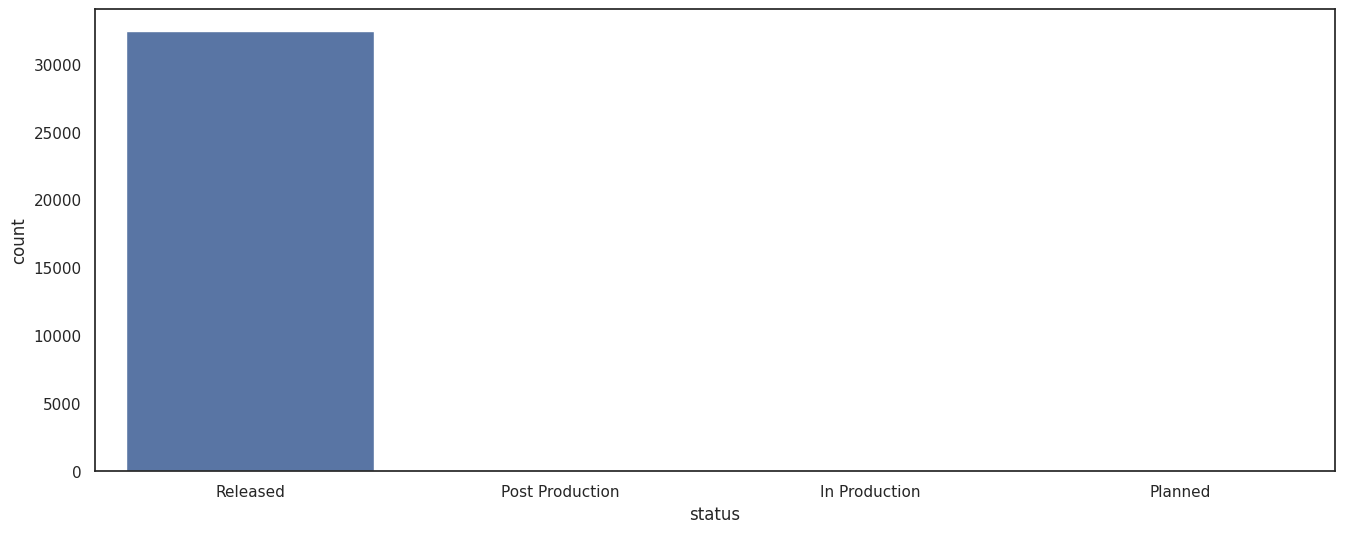

In [3]:
def wideCount(thecolumn):
  sns.set(rc={"figure.figsize":(16,6)})
  sns.set_theme(style="white")
  sns.countplot(x=thecolumn)
wideCount(dta.status)

In [4]:
dta['genre_names'] = dta.genre_names.str.upper()
dta['genre_names_list'] =[i.split(", ") for i in dta.genre_names]

In [5]:
dta2 = dta[['original_title', 'title', 'original_language', 'overview', 'tagline', 'release_date', 'popularity', 'vote_count', \
            'vote_average', 'budget', 'revenue', 'runtime', 'genre_names_list']]

In [6]:
[ dta.genre_names_list[i].remove('HORROR') for i in range(1,dta.shape[0])]

ValueError: list.remove(x): x not in list

In [9]:
'HORROR' in dta2.genre_names_list[0]

True

In [11]:
print(dta2.genre_names_list[1])
'HORROR' in dta2.genre_names_list[1]

['ADVENTURE', 'DRAMA']


False

In [15]:
for i in range(dta2.shape[0]):
    if 'HORROR' in dta2.genre_names_list[i]:
         dta2.genre_names_list[i].remove('HORROR')

In [16]:
dta2.head()

,original_title,title,original_language,overview,tagline,release_date,popularity,vote_count,vote_average,budget,revenue,runtime,genre_names_list
0,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,5088.584,902,6.9,0,9572765,99,[THRILLER]
1,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,2172.338,584,7.1,0,56000000,93,"[ADVENTURE, DRAMA]"
2,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,1863.628,114,6.8,17000000,45000000,115,"[MYSTERY, THRILLER]"
3,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,1071.398,2736,7.9,18800000,161000000,103,[THRILLER]
4,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,1020.995,83,7.0,0,0,0,[]


In [22]:
for i in range(dta2.shape[0]):
    if not len(dta2.genre_names_list[i]):
        dta2.genre_names_list[i].append('HORROR')

In [31]:
dtaWide = pd.get_dummies(dta2.explode('genre_names_list'), prefix="", prefix_sep='', columns=['genre_names_list'])

In [32]:
dtaWide.columns

Index(['original_title', 'title', 'original_language', 'overview', 'tagline',
       'release_date', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue', 'runtime', 'ACTION', 'ADVENTURE', 'ANIMATION', 'COMEDY',
       'CRIME', 'DOCUMENTARY', 'DRAMA', 'FAMILY', 'FANTASY', 'HISTORY',
       'HORROR', 'MUSIC', 'MYSTERY', 'ROMANCE', 'SCIENCE FICTION', 'THRILLER',
       'TV MOVIE', 'WAR', 'WESTERN'],
      dtype='object')

In [33]:
dtaLong = dta2.explode('genre_names_list')

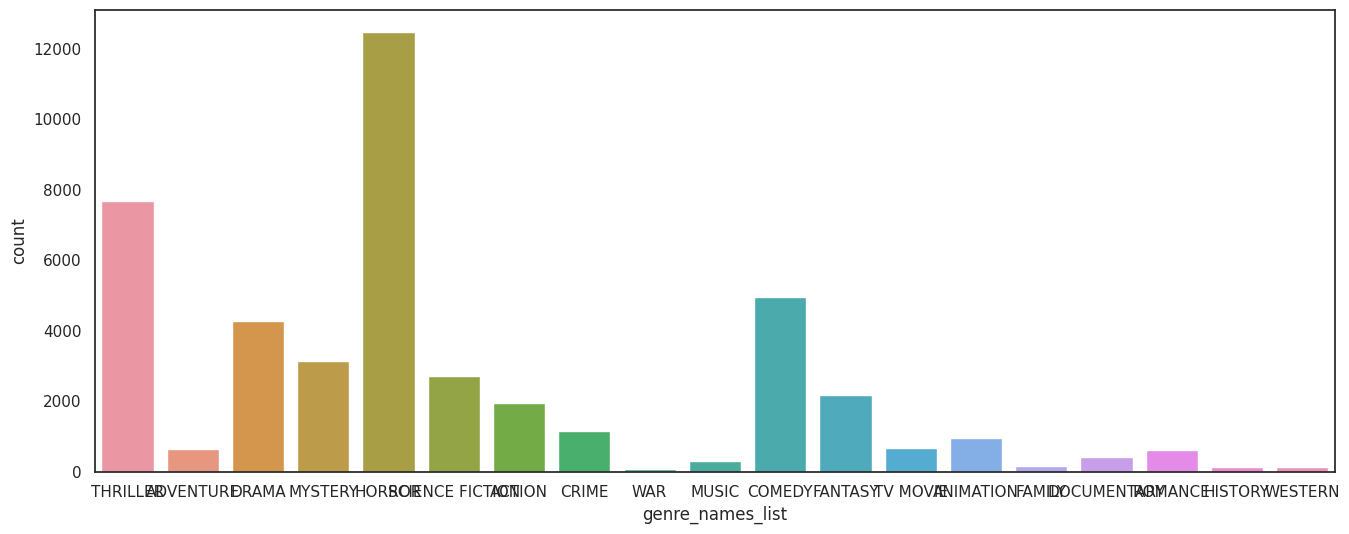

In [35]:
wideCount(dtaLong.genre_names_list)